<a href="https://colab.research.google.com/github/Arpitkamal/Natural-Language-Processing-in-TensorFlow/blob/master/Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#defining hyperparameters
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_token="<OOV>"
training_size = 20000

In [13]:
#downloading the data 
!wget --no-check-certificate \
      https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
      -O /tmp/sarcasm.json


with open("/tmp/sarcasm.json",'r') as f:
  datastore = json.load(f)

print(type(datastore))
print(datastore[0])

sentences =[]
labels =[]
for items in datastore:
  sentences.append(items['headline'])
  labels.append(items['is_sarcastic'])

print(len(sentences)) 

--2020-03-16 06:58:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-03-16 06:58:16 (145 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]

<class 'list'>
{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
26709


In [0]:

#Training and tesing data
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [0]:

#Tokeninzing the data and Padding

tokenizer = Tokenizer(num_words = vocab_size , oov_token = oov_token)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen = max_length,truncating = trunc_type)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen = max_length,padding = padding_type,truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length,padding = padding_type,truncating = trunc_type)

In [0]:

#define the model for neural network
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [22]:

#Compile the model and printing the summary
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 50
#training the data
history = model.fit(training_padded,training_labels,epochs = num_epochs,validation_data = (testing_padded,testing_labels),verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/50
20000/20000 - 2s - loss: 0.5837 - acc: 0.6819 - val_loss: 0.4429 - val_acc: 0.7986
Epoch 2/50
20000/20000 - 2s - loss: 0.3983 - acc: 0.8203 - val_loss: 0.4121 - val_acc: 0.8019
Epoch 3/50
20000/20000 - 2s - loss: 0.3706 - acc: 0.8300 - val_loss: 0.4012 - val_acc: 0.8158
Epoch 4/50
20000/20000 - 2s - loss: 0.3611 - acc: 0.8364 - val_loss: 0.4004 - val_acc: 0.8155
Epoch 5/50
20000/20000 - 2s - loss: 0.3561 - acc: 0.8371 - val_loss: 0.4037 - val_acc: 0.8113
Epoch 6/50
20000/20000 - 2s - loss: 0.3537 - acc: 0.8379 - val_loss: 0.4064 - val_acc: 0.8147
Epoch 7/50
20000/20000 - 2s - loss: 0.3519 - acc: 0.8404 - val_loss: 0.4063 - val_acc: 0.8135
Epoch 8/50
20000/20000 - 2s - loss: 0.3507 - acc: 0.8401 - val_loss: 0.4063 - val_acc: 0.8147
Epoch 9/50
20000/20000 - 2s - loss: 0.3503 - acc: 0.8396 - val_loss: 0.4073 - val_acc: 0.8110
Epoch 10/50
20000/20000 - 2s - loss: 0.3495 - acc: 0.8403 - val_loss: 0.4062 - val_acc: 0.8137
Epoch 11/5

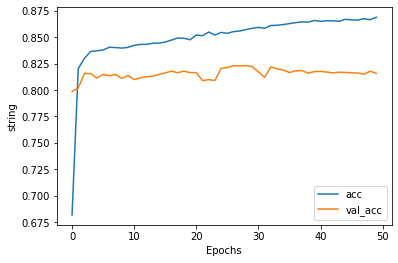

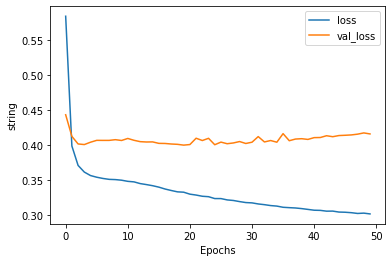

In [24]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel('string')
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"acc")
plot_graphs(history,"loss")

